In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Volume

In [2]:
df_volume = pd.read_csv('/content/drive/MyDrive/crops_dataset/volumes_predicted/maize_vol_df.csv')

In [3]:
df_volume.head()

,Unnamed: 0,time,actual_volume,pred_volume
0,0,2014-01-01,5594202.0,5.935885e+06
1,1,2014-02-01,6198123.0,4.786952e+06
2,2,2014-03-01,3717570.0,4.153002e+06
3,3,2014-04-01,2988596.0,4.034715e+06
4,4,2014-05-01,2452528.0,4.478065e+06


In [4]:
df_volume = df_volume.drop(df_volume.columns[0], axis=1)

In [5]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,5594202.0,5.935885e+06
1,2014-02-01,6198123.0,4.786952e+06
2,2014-03-01,3717570.0,4.153002e+06
3,2014-04-01,2988596.0,4.034715e+06
4,2014-05-01,2452528.0,4.478065e+06
...,...,...,...
121,2024-02-01,NaN,1.402305e+07
122,2024-03-01,NaN,1.332306e+07
123,2024-04-01,NaN,1.320032e+07
124,2024-05-01,NaN,1.364578e+07


In [6]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           126 non-null    object 
 1   actual_volume  78 non-null     float64
 2   pred_volume    126 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Loading the Price

In [7]:
df_price = pd.read_csv('/content/drive/MyDrive/crops_dataset/maize.csv')

In [8]:
df_price.head(5)

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015,Andhra Pradesh
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015,Andhra Pradesh
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015,Andhra Pradesh
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,20-03-2015,Andhra Pradesh
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,11-12-2014,Andhra Pradesh


In [9]:
# Now we only focus on the price part, removing the other columns

df_price = df_price[['Price Date','Modal Price (Rs./Quintal)']]

In [10]:
df_price = df_price.rename(columns={"Price Date": "Date", "Modal Price (Rs./Quintal)": "price"})

In [11]:
df_price

,Date,price
0,07-04-2015,1350.0
1,06-04-2015,1250.0
2,21-03-2015,1250.0
3,20-03-2015,1300.0
4,11-12-2014,1000.0
...,...,...
834273,25-12-2008,600.0
834274,18-12-2008,600.0
834275,27-11-2008,550.0
834276,20-11-2008,550.0


In [12]:
# Convert 'Date' column to datetime format
df_price['Date'] = pd.to_datetime(df_price['Date'], format='%d-%m-%Y')

# Extract year and month from 'Date' column
df_price['YearMonth'] = df_price['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate average price
df_price_avg = df_price.groupby('YearMonth')['price'].mean().reset_index()

# Set day of the date to 01
df_price_avg['Date'] = df_price_avg['YearMonth'].dt.strftime('01-%m-%Y')

# Drop the 'YearMonth' column
df_price_avg = df_price_avg.drop('YearMonth', axis=1)

# Print the average price DataFrame
df_price_avg

,price,Date
0,699.258426,01-04-2008
1,706.936330,01-05-2008
2,779.078836,01-06-2008
3,789.102432,01-07-2008
4,799.584554,01-08-2008
...,...,...
163,1594.299601,01-11-2021
164,1627.974956,01-12-2021
165,1730.170388,01-01-2022
166,1833.180677,01-02-2022


In [13]:
df_price_avg = df_price_avg[['Date','price']]

In [14]:
df_price_avg

,Date,price
0,01-04-2008,699.258426
1,01-05-2008,706.936330
2,01-06-2008,779.078836
3,01-07-2008,789.102432
4,01-08-2008,799.584554
...,...,...
163,01-11-2021,1594.299601
164,01-12-2021,1627.974956
165,01-01-2022,1730.170388
166,01-02-2022,1833.180677


In [15]:
df_volume

,time,actual_volume,pred_volume
0,2014-01-01,5594202.0,5.935885e+06
1,2014-02-01,6198123.0,4.786952e+06
2,2014-03-01,3717570.0,4.153002e+06
3,2014-04-01,2988596.0,4.034715e+06
4,2014-05-01,2452528.0,4.478065e+06
...,...,...,...
121,2024-02-01,NaN,1.402305e+07
122,2024-03-01,NaN,1.332306e+07
123,2024-04-01,NaN,1.320032e+07
124,2024-05-01,NaN,1.364578e+07


In [16]:
# Extract year from 'Date' column
df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year

# Group by 'Year' and calculate the average price for the first half of each month
df_avg_yearly = df_price_avg.groupby('Year')['price'].mean().reset_index()

# Rename the columns
df_avg_yearly.columns = ['Date', 'price']



<ipython-input-16-adbe30befa55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_avg['Year'] = pd.to_datetime(df_price_avg['Date'], format='%d-%m-%Y').dt.year


In [17]:
# Print the average prices for each year
df_avg_yearly

,Date,price
0,2008,747.194930
1,2009,857.258326
2,2010,923.671029
3,2011,1017.206781
4,2012,1174.559789
5,2013,1327.792073
6,2014,1287.420060
7,2015,1340.020833
8,2016,1468.072227
9,2017,1360.694664


In [18]:
# Convert 'time' column to datetime format
df_volume['time'] = pd.to_datetime(df_volume['time'])

# Extract year from 'time' column
df_volume['Year'] = df_volume['time'].dt.year

# Calculate the average actual volume and pred volume for each year
df_volavg_yearly = df_volume.groupby('Year').agg({'actual_volume': 'mean', 'pred_volume': 'mean'}).reset_index()

# Rename the columns
df_volavg_yearly.columns = ['Date', 'Average Actual Volume', 'Average Pred Volume']



In [19]:
# Print the average values for each year
df_volavg_yearly

,Date,Average Actual Volume,Average Pred Volume
0,2014,3.833512e+06,6.112725e+06
1,2015,7.261263e+06,7.079062e+06
2,2016,4.095640e+06,7.993702e+06
3,2017,5.267300e+06,8.909424e+06
4,2018,5.818797e+06,9.825123e+06
5,2019,4.804889e+06,1.074082e+07
6,2020,4.691661e+06,1.165652e+07
7,2021,NaN,1.257222e+07
8,2022,NaN,1.348792e+07
9,2023,NaN,1.440362e+07


# Getting MSP

In [20]:
import pandas as pd

# Create a DataFrame for MSP
msp_data = {
    'Date': list(range(2008, 2023)),
    'msp': [840,840,880,980,1175,1310,1310,1325,1365,1425,1700,1760,1850,1870,1962]
}

df_msp = pd.DataFrame(msp_data)

# Print the MSP DataFrame



In [21]:
df_msp

,Date,msp
0,2008,840
1,2009,840
2,2010,880
3,2011,980
4,2012,1175
5,2013,1310
6,2014,1310
7,2015,1325
8,2016,1365
9,2017,1425


In [22]:
crop_price_df = pd.merge(df_avg_yearly, df_msp, on='Date')

In [23]:
crop_price_df

,Date,price,msp
0,2008,747.194930,840
1,2009,857.258326,840
2,2010,923.671029,880
3,2011,1017.206781,980
4,2012,1174.559789,1175
5,2013,1327.792073,1310
6,2014,1287.420060,1310
7,2015,1340.020833,1325
8,2016,1468.072227,1365
9,2017,1360.694664,1425


In [24]:
# Calculate the difference between 'msp' and 'price' and add it as a new column
crop_price_df['difference'] = crop_price_df['price'] - crop_price_df['msp']


In [25]:
crop_price_df

,Date,price,msp,difference
0,2008,747.194930,840,-92.805070
1,2009,857.258326,840,17.258326
2,2010,923.671029,880,43.671029
3,2011,1017.206781,980,37.206781
4,2012,1174.559789,1175,-0.440211
5,2013,1327.792073,1310,17.792073
6,2014,1287.420060,1310,-22.579940
7,2015,1340.020833,1325,15.020833
8,2016,1468.072227,1365,103.072227
9,2017,1360.694664,1425,-64.305336


# MSP and Avg_Price

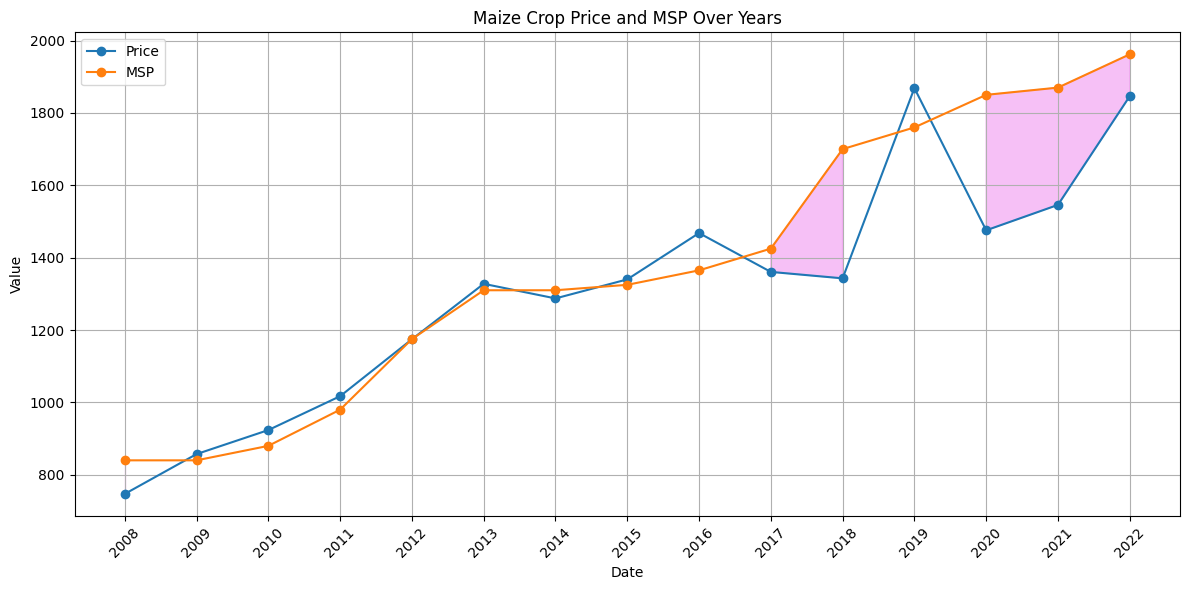

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting 'price' and 'msp' over 'Date'
plt.figure(figsize=(12, 6))
plt.plot(crop_price_df['Date'], crop_price_df['price'], marker='o', label='Price')
plt.plot(crop_price_df['Date'], crop_price_df['msp'], marker='o', label='MSP')

# Shade the region where price is greater than msp
plt.fill_between(crop_price_df['Date'], crop_price_df['price'], crop_price_df['msp'],
                 where=crop_price_df['price'] < crop_price_df['msp'], color='violet', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Maize Crop Price and MSP Over Years')
plt.legend()
plt.grid(True)
plt.xticks(crop_price_df['Date'], rotation=45)
plt.tight_layout()
plt.show()

# Liability for the crop

In [27]:
liability_df = pd.merge(df_volavg_yearly, crop_price_df, on='Date', how='inner')



In [28]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference
0,2014,3.833512e+06,6.112725e+06,1287.420060,1310,-22.579940
1,2015,7.261263e+06,7.079062e+06,1340.020833,1325,15.020833
2,2016,4.095640e+06,7.993702e+06,1468.072227,1365,103.072227
3,2017,5.267300e+06,8.909424e+06,1360.694664,1425,-64.305336
4,2018,5.818797e+06,9.825123e+06,1342.912177,1700,-357.087823
5,2019,4.804889e+06,1.074082e+07,1868.635635,1760,108.635635
6,2020,4.691661e+06,1.165652e+07,1475.650199,1850,-374.349801
7,2021,NaN,1.257222e+07,1545.886392,1870,-324.113608
8,2022,NaN,1.348792e+07,1846.332692,1962,-115.667308


In [29]:
# Calculate actual_liability
liability_df['actual_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Actual Volume'] if row['difference'] < 0 else np.nan, axis=1)

# Calculate pred_liability
liability_df['pred_liability'] = liability_df.apply(lambda row: abs(row['difference']) * row['Average Pred Volume'] if row['difference'] < 0 else np.nan, axis=1)




In [30]:
liability_df

,Date,Average Actual Volume,Average Pred Volume,price,msp,difference,actual_liability,pred_liability
0,2014,3.833512e+06,6.112725e+06,1287.420060,1310,-22.579940,8.656048e+07,1.380250e+08
1,2015,7.261263e+06,7.079062e+06,1340.020833,1325,15.020833,NaN,NaN
2,2016,4.095640e+06,7.993702e+06,1468.072227,1365,103.072227,NaN,NaN
3,2017,5.267300e+06,8.909424e+06,1360.694664,1425,-64.305336,3.387155e+08,5.729235e+08
4,2018,5.818797e+06,9.825123e+06,1342.912177,1700,-357.087823,2.077822e+09,3.508432e+09
5,2019,4.804889e+06,1.074082e+07,1868.635635,1760,108.635635,NaN,NaN
6,2020,4.691661e+06,1.165652e+07,1475.650199,1850,-374.349801,1.756322e+09,4.363617e+09
7,2021,NaN,1.257222e+07,1545.886392,1870,-324.113608,NaN,4.074828e+09
8,2022,NaN,1.348792e+07,1846.332692,1962,-115.667308,NaN,1.560111e+09


In [31]:
# Save the dataframe to a CSV file
liability_df.to_csv('maize_liability_data.csv', index=False)

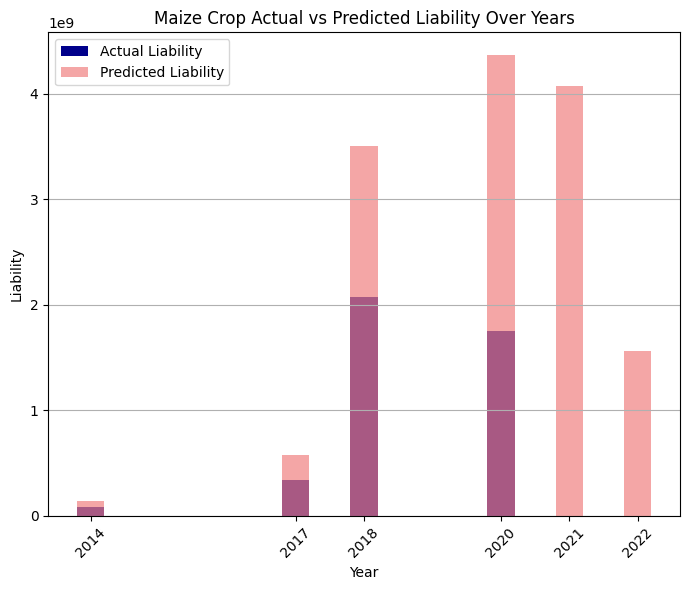

In [32]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability']
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability']
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(7, 6))
plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4,color='darkblue')
plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4,color='lightcoral')  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability')
plt.title('Maize Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


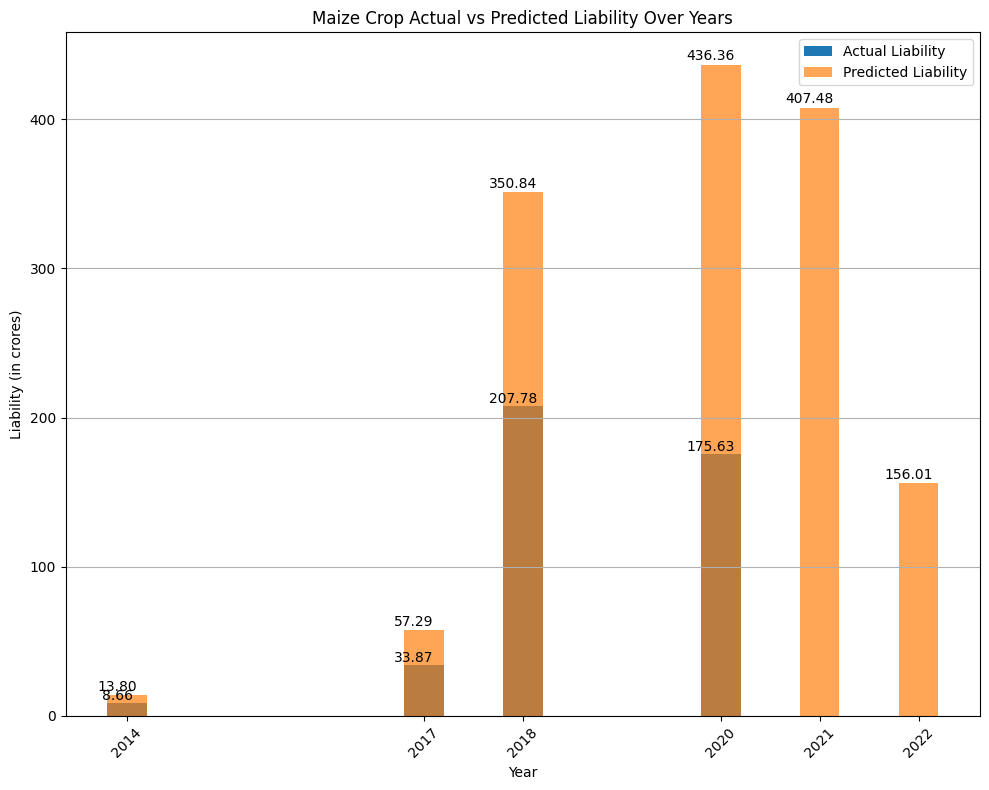

In [33]:
import matplotlib.pyplot as plt

# Filter out NaN values in 'actual_liability' and 'pred_liability'
actual_liability_values = liability_df.loc[~liability_df['actual_liability'].isnull(), 'actual_liability'] / 1e7
pred_liability_values = liability_df.loc[~liability_df['pred_liability'].isnull(), 'pred_liability'] / 1e7
years_act = liability_df.loc[~liability_df['actual_liability'].isnull(), 'Date']
years_pred = liability_df.loc[~liability_df['pred_liability'].isnull(), 'Date']

# Get unique years for x-axis ticks
years = sorted(list(set(list(years_act) + list(years_pred))))

# Plotting 'actual_liability' and 'pred_liability' as bar plots
plt.figure(figsize=(10, 8))
bars1 = plt.bar(years_act, actual_liability_values, label='Actual Liability', width=0.4)
bars2 = plt.bar(years_pred, pred_liability_values, label='Predicted Liability', alpha=0.7, width=0.4)  # Using alpha to make bars semi-transparent
plt.xlabel('Year')
plt.ylabel('Liability (in crores)')
plt.title('Maize Crop Actual vs Predicted Liability Over Years')
plt.legend()
plt.grid(axis='y')  # Grid only along the y-axis
plt.xticks(years, rotation=45)

# Add the liability values on top of the bars
for bar, liability_values in zip(bars1, actual_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{liability_values:.2f}', ha='center', va='bottom')
for bar, liability_values in zip(bars2, pred_liability_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.99, f'{liability_values:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
